`Clickbait Detection Notebook`

Installing necessary packages:

In [ ]:
import sys
#!{sys.executable} -m pip install -r requirements.txt

<b>Part 1:</b>
<br>This first part runs through training four classifiers on training data. Then, the classifiers are tested on either the training data or external data. The accuracy and f1 scores are found for each classifier.

<br><u>The four classifiers are:</u>
    <br>Multinomial Naive Bayes
    <br>Stochastic Gradient Descent
    <br>Perceptron
    <br>Support Vector Machine

In [4]:
# Part 1

# Import cell

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn import svm

from sklearn import metrics

import matplotlib.pyplot as plt


# Used to increase parallel computing on CPU
# pip install scikit-learn-intelex
from sklearnex import patch_sklearn
#patch_sklearn()

In [5]:
# Part 1

# Reading data into pandas dataframe

# Defining Constants
clickbait_title_column = "headline"
is_clickbait_column = "clickbait"

# Pandas dataframe df
df = pd.read_csv("input_data/clickbait_consensus.csv")

y = df[is_clickbait_column]
X = df[clickbait_title_column]

print("Data formated")

Data formated


In [6]:
# Part 1

# Vectorizing data in order for classifiers to use them
# This is required because classifiers need to numerical data, 
#   so the titles (wihch are strings) need to be transformed numerically

vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(X)

print("Data vectorized")

Data vectorized


In [7]:
# Part 1

# Asking user what data to test classifiers on

print("-------------------------TEST DATA-----------------------------------------\n")

which_data = input("Would you like to test on training data (enter 0) or pre-determined, external data (enter 1)? ")

if (which_data == "0"):
    print("Training data chosen")
    test_multi_titles = df[clickbait_title_column]
    test_multi_titles_nparray = df[is_clickbait_column].to_numpy()

    vectors_test = vectorizer.transform(test_multi_titles)

else:
    print("External data chosen")
    
    test_df = pd.read_csv("input_data/clickbait_ratio_flattened.csv")

    test_multi_titles = test_df[clickbait_title_column]
    test_multi_titles_nparray = test_df[is_clickbait_column].to_numpy()

    vectors_test = vectorizer.transform(test_multi_titles)

-------------------------TEST DATA-----------------------------------------

External data chosen


-------------------------MULTINOMIALNB PREDICTING-----------------------------------------

Prediction: [1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1
 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1
 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1
 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0]

Total accuracy classification score: 0.65
Total F1 classification score: 0.6382802811078958
Total ROC classification score: 0.6482648264826483


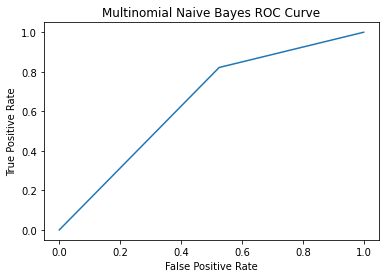

In [8]:
# Part 1

# Multinomial Naive Bayes Classification

print("-------------------------MULTINOMIALNB PREDICTING-----------------------------------------\n")

multiNB_clf = MultinomialNB(alpha=0.00001)
multiNB_clf.fit(vectors, y)


multiNB_pred = multiNB_clf.predict(vectors_test)

print("Prediction:", multiNB_pred)
print()

acc_score_multiNB = metrics.accuracy_score(test_multi_titles_nparray, multiNB_pred)
f1_score_multNB = metrics.f1_score(test_multi_titles_nparray, multiNB_pred, average='macro')
roc_score_multiNB = metrics.roc_auc_score(test_multi_titles_nparray, multiNB_pred)

print('Total accuracy classification score: {}'.format(acc_score_multiNB))
print('Total F1 classification score: {}'.format(f1_score_multNB))
print('Total ROC classification score: {}'.format(roc_score_multiNB))

# precision_score_multiNB = metrics.precision_score(test_multi_titles_nparray, multiNB_pred, average='macro')
# recall_score_multiNB = metrics.recall_score(test_multi_titles_nparray, multiNB_pred, average='macro')

# print('\nTotal precision score: {}'.format(precision_score_multiNB))
# print('Total recall score: {}'.format(recall_score_multiNB))

# Get data for ROC Curve
multiNB_fpr, multiNB_tpr, thresholds = metrics.roc_curve(test_multi_titles_nparray, multiNB_pred)

# Create ROC curve
plt.plot(multiNB_fpr, multiNB_tpr)

# Add axis labels to plot
plt.title('Multinomial Naive Bayes ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Display plot and save plot as jpg
#plt.show()
plt.savefig("mulitNB_roc_curve.jpg")


-------------------------STOCHSTIC GRADIENT DESCENT (SGD) PREDICTING---------------------------------------

Prediction: [1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1
 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0
 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1]

Total accuracy classification score: 0.64
Total F1 classification score: 0.6363636363636364
Total ROC classification score: 0.641064106410641


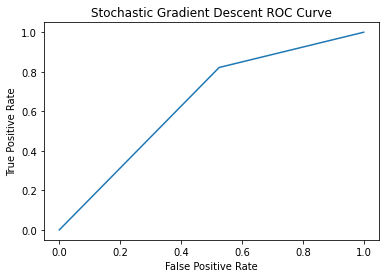

In [9]:
# Part 1

# Stochastic Gradient Descent Classification

print("-------------------------STOCHSTIC GRADIENT DESCENT (SGD) PREDICTING---------------------------------------\n")

SGD_clf = SGDClassifier(loss="huber", penalty="l2", max_iter=5000)
SGD_clf.fit(vectors, y)

SGD_pred = SGD_clf.predict(vectors_test)

print("Prediction:", SGD_pred)
print()

acc_score_SGD = metrics.accuracy_score(test_multi_titles_nparray, SGD_pred)
f1_score_SGD = metrics.f1_score(test_multi_titles_nparray, SGD_pred, average='macro')
roc_score_SGD = metrics.roc_auc_score(test_multi_titles_nparray, SGD_pred)

print('Total accuracy classification score: {}'.format(acc_score_SGD))
print('Total F1 classification score: {}'.format(f1_score_SGD))
print('Total ROC classification score: {}'.format(roc_score_SGD))


# Get data for ROC Curve
SGD_fpr, SGD_tpr, thresholds = metrics.roc_curve(test_multi_titles_nparray, multiNB_pred)

# Create ROC curve
plt.plot(SGD_fpr, SGD_tpr)

# Add axis labels to plot
plt.title('Stochastic Gradient Descent ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Display plot and save plot as jpg
#plt.show()
plt.savefig("SGD_roc_curve.jpg")

-------------------------PERCEPTRON PREDICTING---------------------------------------

Prediction: [1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1
 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1]

Total accuracy classification score: 0.61
Total F1 classification score: 0.6085909273384182
Total ROC classification score: 0.6094609460946094


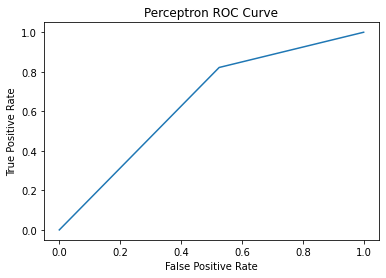

In [10]:
# Part 1

# Perceptron Classification

print("-------------------------PERCEPTRON PREDICTING---------------------------------------\n")

perceptron_clf = Perceptron(tol=1e-3, random_state=0)
perceptron_clf.fit(vectors, y)

perceptron_pred = perceptron_clf.predict(vectors_test)

print("Prediction:", perceptron_pred)
print()

acc_score_perceptron = metrics.accuracy_score(test_multi_titles_nparray, perceptron_pred)
f1_score_perceptron = metrics.f1_score(test_multi_titles_nparray, perceptron_pred, average='macro')
roc_score_perceptron = metrics.roc_auc_score(test_multi_titles_nparray, perceptron_pred)

print('Total accuracy classification score: {}'.format(acc_score_perceptron))
print('Total F1 classification score: {}'.format(f1_score_perceptron))
print('Total ROC classification score: {}'.format(roc_score_perceptron))


# Get data for ROC Curve
perceptron_fpr, perceptron_tpr, thresholds = metrics.roc_curve(test_multi_titles_nparray, multiNB_pred)

# Create ROC curve
plt.plot(perceptron_fpr, perceptron_tpr)

# Add axis labels to plot
plt.title('Perceptron ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Display plot and save plot as jpg
#plt.show()
plt.savefig("perceptron_roc_curve.jpg")

-------------------------SVM PREDICTING---------------------------------------

Prediction: [1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0
 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1
 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]

Total accuracy classification score: 0.595
Total F1 classification score: 0.594178210877026
Total ROC classification score: 0.5955095509550955


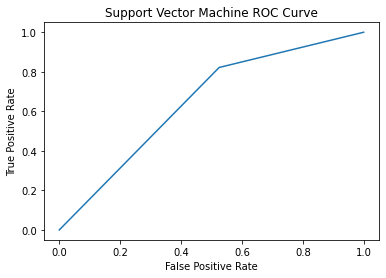

In [12]:
# Part 1

# Support Vector Machine Classification

print("-------------------------SVM PREDICTING---------------------------------------\n")

SVM_clf = svm.SVC(gamma=3, kernel='sigmoid')
SVM_clf.fit(vectors, y)

SVM_pred = SVM_clf.predict(vectors_test)

print("Prediction:", SVM_pred)
print()

acc_score_SVM = metrics.accuracy_score(test_multi_titles_nparray, SVM_pred)
f1_score_SVM = metrics.f1_score(test_multi_titles_nparray, SVM_pred, average='macro')
roc_score_SVM = metrics.roc_auc_score(test_multi_titles_nparray, SVM_pred)

print('Total accuracy classification score: {}'.format(acc_score_SVM))
print('Total F1 classification score: {}'.format(f1_score_SVM))
print('Total ROC classification score: {}'.format(roc_score_SVM))


# Get data for ROC Curve
SVM_fpr, SVM_tpr, thresholds = metrics.roc_curve(test_multi_titles_nparray, multiNB_pred)

# Create ROC curve
plt.plot(SVM_fpr, SVM_tpr)

# Add axis labels to plot
plt.title('Support Vector Machine ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Display plot and save plot as jpg
#plt.show()
plt.savefig("SVM_roc_curve.jpg")

<b>Part 2</b>
<br> Part 2 allows you, the user, to enter in your own titles that you find on the internet or create on your own and run it throught the four classifiers to see if it's clickbait.
<br>
<br> The notebook will walk through the functions for training the classifiers (same process as above, only it is formatted professionally now). Then, you will be prompted to enter text so that the classifiers can predict clickbait status.

In [ ]:
# Part 2

# trainClassifiers() runs a compiled .csv file through all four classifiers of over 30,000 data points.

def trainClassifiers():

    print("\nTraining classifiers...", end="")

     # Defining Constants
    clickbait_title_column = "headline"
    is_clickbait_column = "clickbait"

    # Pandas dataframe df
    df = pd.read_csv("input_data/clickbait_compilation.csv")


    y = df[is_clickbait_column]
    X = df[clickbait_title_column].str.lower() # All titles are in lowercase


    vectorizer = CountVectorizer()
    vectors = vectorizer.fit_transform(X)


    # MultinomialNB
    multiNB_clf = MultinomialNB(alpha=0.00001)
    multiNB_clf.fit(vectors, y)

    # SGD
    SGD_clf = SGDClassifier(loss="huber", penalty="l2", max_iter=5000)
    SGD_clf.fit(vectors, y)

    # Perceptron
    perceptron_clf = Perceptron(tol=1e-3, random_state=0)
    perceptron_clf.fit(vectors, y)

    # SVM
    SVM_clf = svm.SVC(gamma=3, kernel='sigmoid')
    SVM_clf.fit(vectors, y)

    print("done")

    return vectorizer, multiNB_clf, SGD_clf, perceptron_clf, SVM_clf

In [ ]:
# Part 2

# predictWithClassifiers() takes the user's entry and predicts clickbait status on all four classifiers

def predictWithClassifiers(user_clickbait_title, vectorizer, multiNB_pred, SGD_pred, perceptron_pred, SVM_pred):
        
        print("\n-----------------------------------------------------------")
        print("STATISTICS:")

        # Vectorize the title to pass into the prediction of the classifier
        vector_user_title_test = vectorizer.transform(user_clickbait_title)

        # Multinomial Prediction
        multiNB_pred = multiNB_clf.predict(vector_user_title_test)
        print("Multinomial Naive Bayes Prediction:\t\t", multiNB_pred)


        # Stochastic Gradient Descent Prediction
        SGD_pred = SGD_clf.predict(vector_user_title_test)
        print("Stochastic Gradient Descent Prediction:\t\t", SGD_pred)


        # Perceptron Prediction
        perceptron_pred = perceptron_clf.predict(vector_user_title_test)
        print("Perceptron Prediction:\t\t\t\t", perceptron_pred)
        

        # SVM prediction
        SVM_pred = SVM_clf.predict(vector_user_title_test)
        print("Support Vector Machine Prediction:\t\t", SVM_pred)

        return multiNB_pred, SGD_pred, perceptron_pred, SVM_pred

In [ ]:
# Part 2

# classifierClickbaitStatus()) finds the clickbait status of all four classifiers by averaging their predictions
# Prediction values are [0] for a non-clickbait title and [1] for a clickbait title

def classifierClickbaitRatio(multiNB_pred, SGD_pred, perceptron_pred, SVM_pred):
    classifier_clickbait_ratio = (multiNB_pred+SGD_pred+perceptron_pred+SVM_pred)/ num_of_classifiers

    print("\nTotal Classification Clickbait Status:\t\t\t", classifier_clickbait_ratio)
    print("\n-----------------------------------------------------------")

    return classifier_clickbait_ratio


In [ ]:
# Part 2

# determineClickbait() determines if the title is clickbait based on the four classifier predictions

def determineClickbait(classifier_clickbait_ratio, isClickbait_threshold, possiblyClickbait_threshold):
    # If the classifier accuracy is above the threshold, title is clickbait
    # Else, it's below the threshold, so title is not clickbait
    
    if (classifier_clickbait_ratio >= isClickbait_threshold):
        print("\nCLICKBAIT")
    elif (classifier_clickbait_ratio == possiblyClickbait_threshold):
        print("\nPOSSIBLY CLICKBAIT")
    else:
        print("\nNOT CLICKBAIT")

In [ ]:
# Part 2

# This cell trains the classifiers on the training data

# train Classifiers on over 30,000 data points
vectorizer, multiNB_clf, SGD_clf, perceptron_clf, SVM_clf = trainClassifiers()

In [ ]:
# Part 2

# This cell asks for user input and runs prediction on the input
# Displays results of prediction as well as clickbait determination

# Constants
num_of_classifiers = 4
isClickbait_threshold = 0.75
possiblyClickbait_threshold = 0.5

# Get user clickbait title
user_clickbait_title = input("\n\nEnter a title to see if it's clickbait (-1 to quit):\n").lower()

if (user_clickbait_title != "-1"):

    # Turn string title into list iterable for vectorization
    user_clickbait_title = [user_clickbait_title]

    # Predicting the clickbait classification on all classifiers
    multiNB_pred, SGD_pred, perceptron_pred, SVM_pred = predictWithClassifiers(user_clickbait_title, vectorizer, multiNB_clf, SGD_clf, perceptron_clf, SVM_clf)

    # Total mean classifier accuracy to determine if the title is clickbait
    classifier_clickbait_ratio = classifierClickbaitRatio(multiNB_pred, SGD_pred, perceptron_pred, SVM_pred)

    # Determing that clickbait status of the user's title
    determineClickbait(classifier_clickbait_ratio, isClickbait_threshold, possiblyClickbait_threshold)

else:
    print("Bye now!")